# Prediction of subscription status based on customer demographic

## What are the factors that affect a consumer decision on enrolling in a loyalty program?


In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

## Data Exploration & Cleaning

In [2]:
data = pd.read_csv('shopping_behavior_updated.csv')
data

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,3896,40,Female,Hoodie,Clothing,28,Virginia,L,Turquoise,Summer,4.2,No,2-Day Shipping,No,No,32,Venmo,Weekly
3896,3897,52,Female,Backpack,Accessories,49,Iowa,L,White,Spring,4.5,No,Store Pickup,No,No,41,Bank Transfer,Bi-Weekly
3897,3898,46,Female,Belt,Accessories,33,New Jersey,L,Green,Spring,2.9,No,Standard,No,No,24,Venmo,Quarterly
3898,3899,44,Female,Shoes,Footwear,77,Minnesota,S,Brown,Summer,3.8,No,Express,No,No,24,Venmo,Weekly


In [3]:
data.describe()

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000
mean,1950.500000,44.068462,59.764359,3.749949,25.351538
std,1125.977353,15.207589,23.685392,0.716223,14.447125
min,1.000000,18.000000,20.000000,2.500000,1.000000
25%,975.750000,31.000000,39.000000,3.100000,13.000000
50%,1950.500000,44.000000,60.000000,3.700000,25.000000
75%,2925.250000,57.000000,81.000000,4.400000,38.000000
max,3900.000000,70.000000,100.000000,5.000000,50.000000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         3900 non-null   

In [5]:
data.isnull().sum()

Customer ID               0
Age                       0
Gender                    0
Item Purchased            0
Category                  0
Purchase Amount (USD)     0
Location                  0
Size                      0
Color                     0
Season                    0
Review Rating             0
Subscription Status       0
Shipping Type             0
Discount Applied          0
Promo Code Used           0
Previous Purchases        0
Payment Method            0
Frequency of Purchases    0
dtype: int64

In [6]:
data.duplicated().sum()

0

## Exploration of Categorical data

We choose to explore: Payment method, Frequency, Gender, Size, Item purchased,  as our categorical components to a customer's demographic

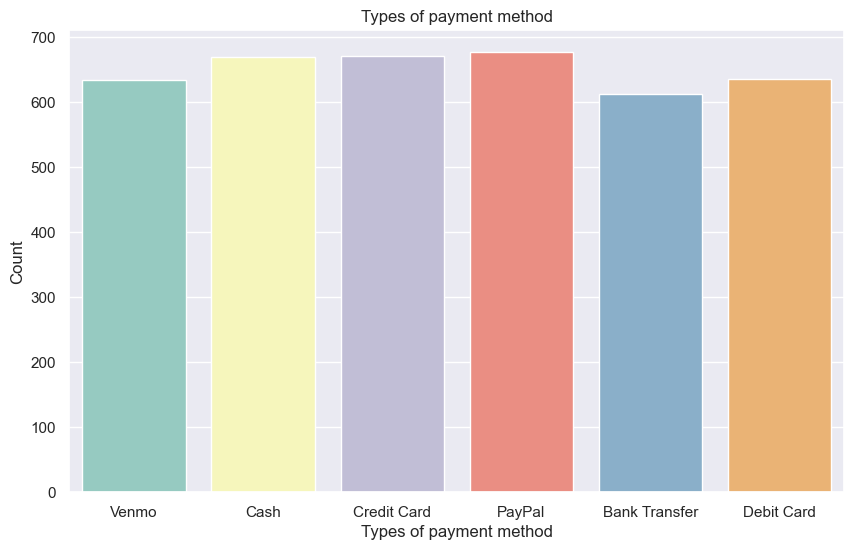

In [7]:
plt.figure(figsize=(10, 6))
sb.countplot(data=data, x='Payment Method', palette='Set3')
plt.title('Types of payment method')
plt.xlabel('Types of payment method')
plt.ylabel('Count')
plt.show()

### To Simplify the payment methods, we categorise the payments into 3 mode: digital, card and cash payments

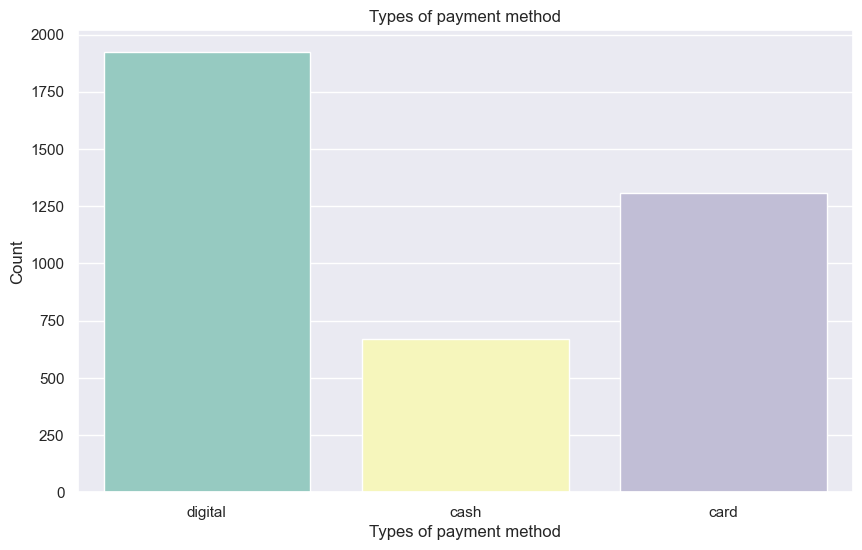

In [8]:
data['Payment Method'] = data['Payment Method'].replace({
    'Venmo': 'digital',
    'PayPal': 'digital',
    'Bank Transfer': 'digital',
    'Credit Card': 'card',
    'Debit Card': 'card',
    'Cash': 'cash'
})

plt.figure(figsize=(10, 6))
sb.countplot(data=data, x='Payment Method', palette='Set3')
plt.title('Types of payment method')
plt.xlabel('Types of payment method')
plt.ylabel('Count')
plt.show()

In [9]:
data['Frequency of Purchases'].unique()

array(['Fortnightly', 'Weekly', 'Annually', 'Quarterly', 'Bi-Weekly',
       'Monthly', 'Every 3 Months'], dtype=object)

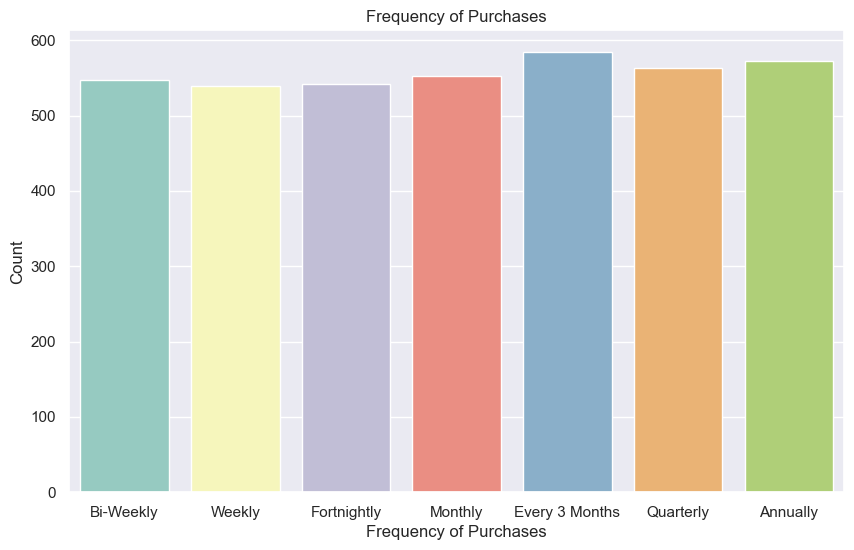

In [10]:
order = ['Bi-Weekly', 'Weekly', 'Fortnightly', 'Monthly', 'Every 3 Months', 'Quarterly', 'Annually']
plt.figure(figsize=(10, 6))
sb.countplot(data=data, x='Frequency of Purchases', palette='Set3', order=order)
plt.title('Frequency of Purchases')
plt.xlabel('Frequency of Purchases')
plt.ylabel('Count')
plt.show()

### Realised Frequency of purchases can be represented better as there are duplicates. 

### "Bi-weekly" and "Fortnightly" is the same as well as "every 3 months" and "quarterly". Therefore, we shall combine them into fortnightly and quarterly. We will also change the different frequency into numerical values that represent how many times a customer purchases in a year.

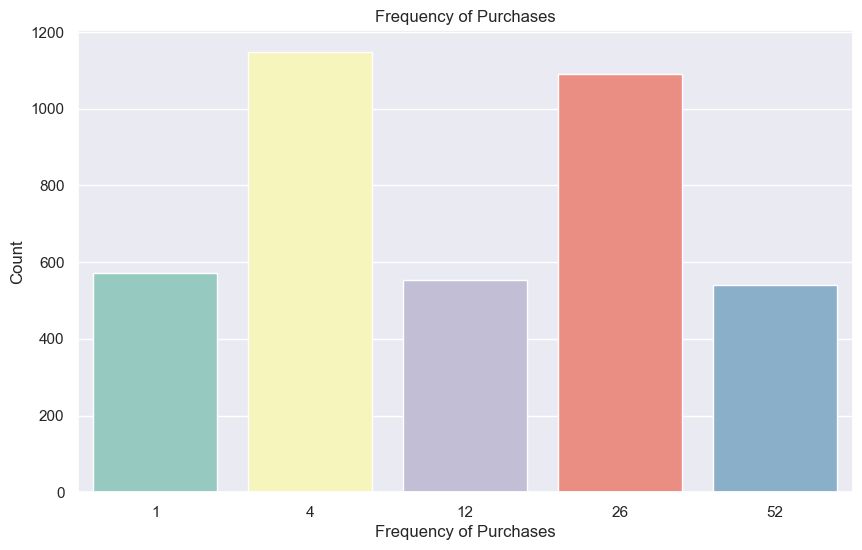

In [11]:
def simplify_frequency(frequency):
    if 'Fortnightly' in frequency or 'Bi-Weekly' in frequency:
        return 'Fortnightly'
    elif 'Every 3 Months' in frequency:
        return 'Quarterly'
    else:
        return frequency
# Apply the function to the dataframe
data['Frequency of Purchases'] = data['Frequency of Purchases'].apply(simplify_frequency)

# Function to map simplified categories to numerical values
def map_to_months(simplified_frequency):
    if simplified_frequency == 'Fortnightly':
        return 26
    elif simplified_frequency == 'Weekly':
        return 52
    elif simplified_frequency == 'Monthly':
        return 12
    elif simplified_frequency == 'Quarterly':
        return 4
    elif simplified_frequency == 'Annually':
        return 1
    else:
        return None  # Handle any other cases if necessary
data['Frequency of Purchases'] = data['Frequency of Purchases'].apply(map_to_months)

plt.figure(figsize=(10, 6))
sb.countplot(data=data, x='Frequency of Purchases', palette='Set3')
plt.title('Frequency of Purchases')
plt.xlabel('Frequency of Purchases')
plt.ylabel('Count')
plt.show()

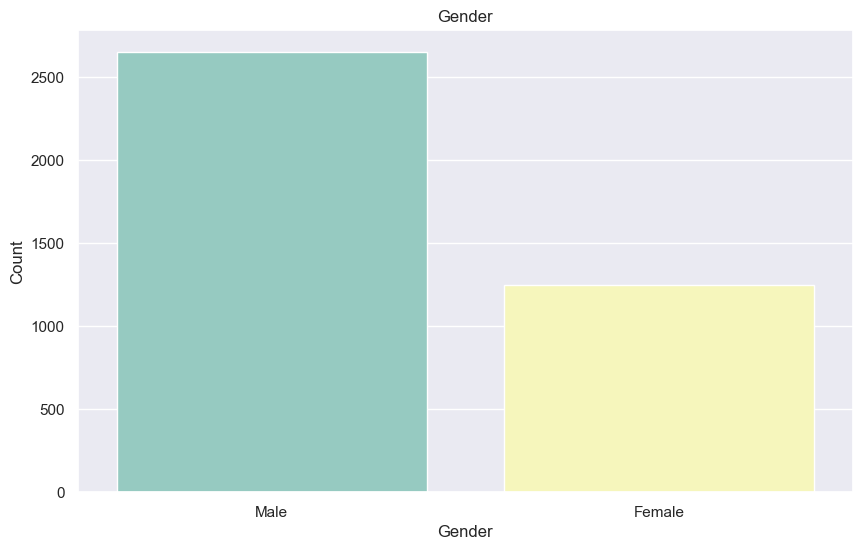

In [12]:
plt.figure(figsize=(10, 6))
sb.countplot(data=data, x='Gender', palette='Set3')
plt.title('Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

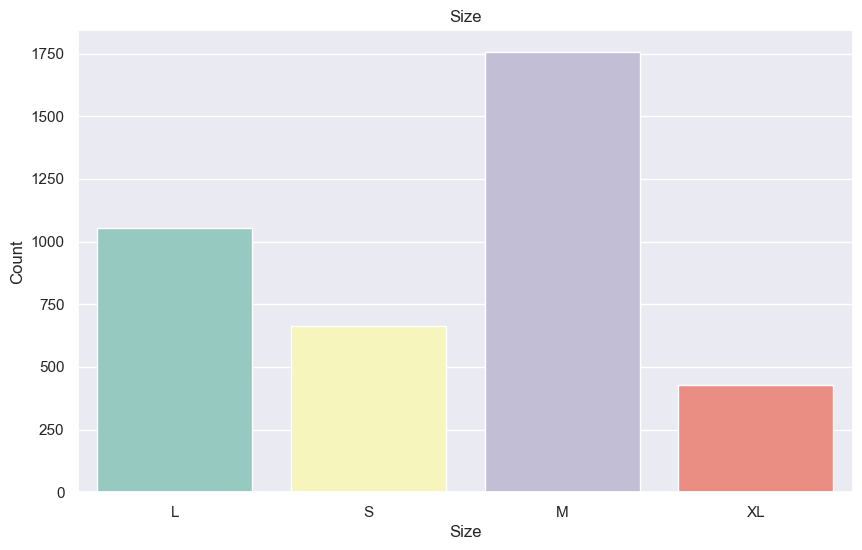

In [13]:
plt.figure(figsize=(10, 6))
sb.countplot(data=data, x='Size', palette='Set3')
plt.title('Size')
plt.xlabel('Size')
plt.ylabel('Count')
plt.show()

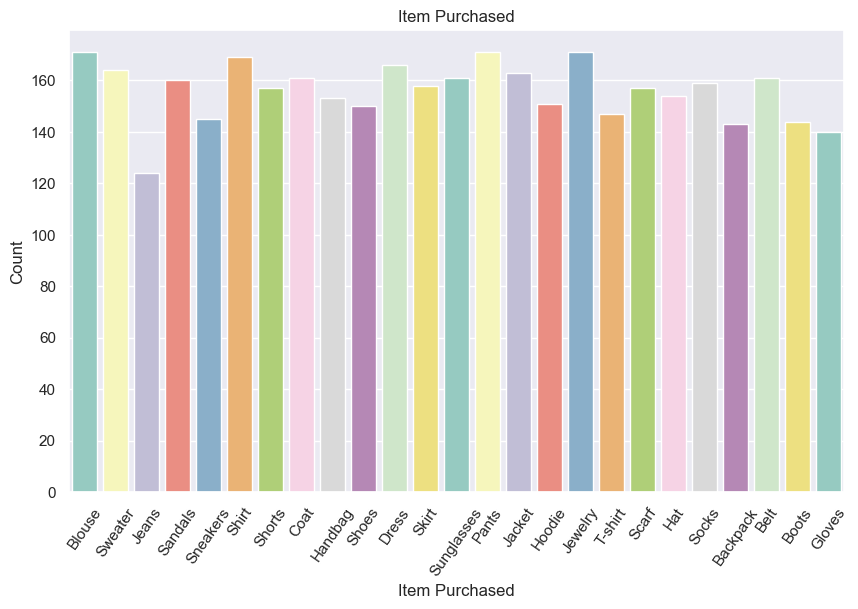

In [14]:
plt.figure(figsize=(10, 6))
sb.countplot(data=data, x='Item Purchased', palette='Set3')
plt.title('Item Purchased')
plt.xlabel('Item Purchased')
plt.ylabel('Count')
plt.xticks(rotation=55)
plt.show()

## Exploration of Numerical Data

### We choose the Subscription status, Discount usage, Purchase Amount, Age and Review ratings as numerical data

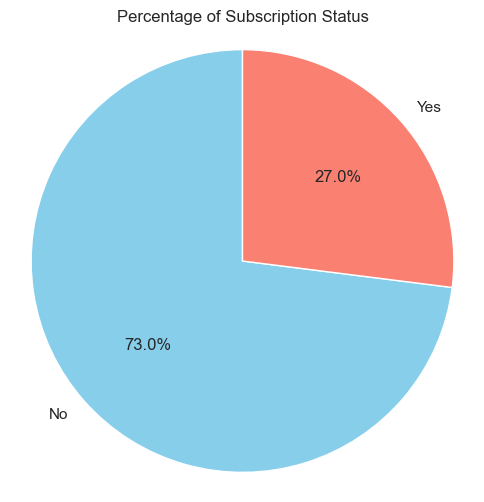

In [15]:
# Calculate the proportion of subscribers and non-subscribers
subscription_counts = data['Subscription Status'].value_counts(normalize=True)

# Plot the pie chart
plt.figure(figsize=(6, 6))
plt.pie(subscription_counts, labels=subscription_counts.index, autopct='%1.1f%%', colors=['skyblue', 'salmon'], startangle=90)
plt.title('Percentage of Subscription Status')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

# Show the plot
plt.show()

### From this chart, we can see that most of our customers are not subscribed to us yet which aligns our problem statement which is to find out what factors of customers are more likely to subscribed to one. 

### As such, we can target customers with higher chances of signing up for one and increase the amount of customers in the loyalty program.

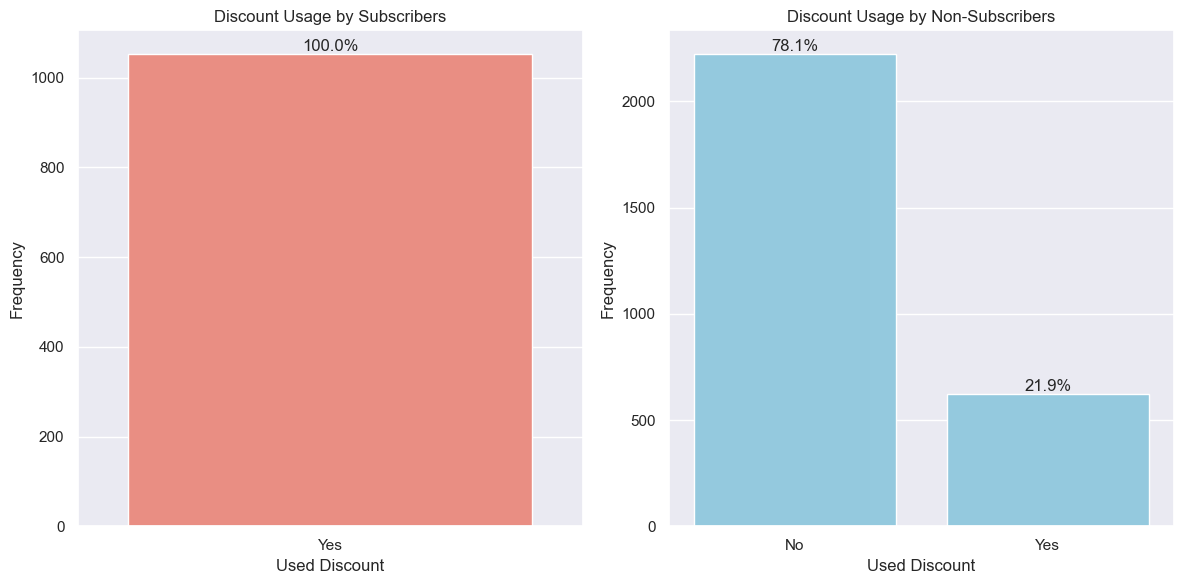

In [23]:
# Calculate the total counts for subscribers and non-subscribers
total_subscribers = subscribers_discount_counts.sum()
total_non_subscribers = non_subscribers_discount_counts.sum()

# Set up the figure and axes
plt.figure(figsize=(12, 6))

# Plot bar graph for subscribers
plt.subplot(1, 2, 1)
ax1 = sb.barplot(x=subscribers_discount_counts.index, y=subscribers_discount_counts.values, color='salmon')
plt.title('Discount Usage by Subscribers')
plt.xlabel('Used Discount')
plt.ylabel('Frequency')

# Plot bar graph for non-subscribers
plt.subplot(1, 2, 2)
ax2 = sb.barplot(x=non_subscribers_discount_counts.index, y=non_subscribers_discount_counts.values, color='skyblue')
plt.title('Discount Usage by Non-Subscribers')
plt.xlabel('Used Discount')
plt.ylabel('Frequency')

# Function to add percentage labels
def add_percentage_labels(ax, total):
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height() / total)
        x = p.get_x() + p.get_width() / 2
        y = p.get_height()
        ax.annotate(percentage, (x, y), ha='center', va='bottom')


add_percentage_labels(ax1, total_subscribers)
add_percentage_labels(ax2, total_non_subscribers)
plt.tight_layout()
plt.show()


### Base on the comparison above, we can tell that all of our subscribers knows and have used discounts when checking out. However, most of the non-subscribers have not used discounts when checking out. We can assume that they are probably not up to date to our promo codes, or they don't have access to discounts only for subscribers. 

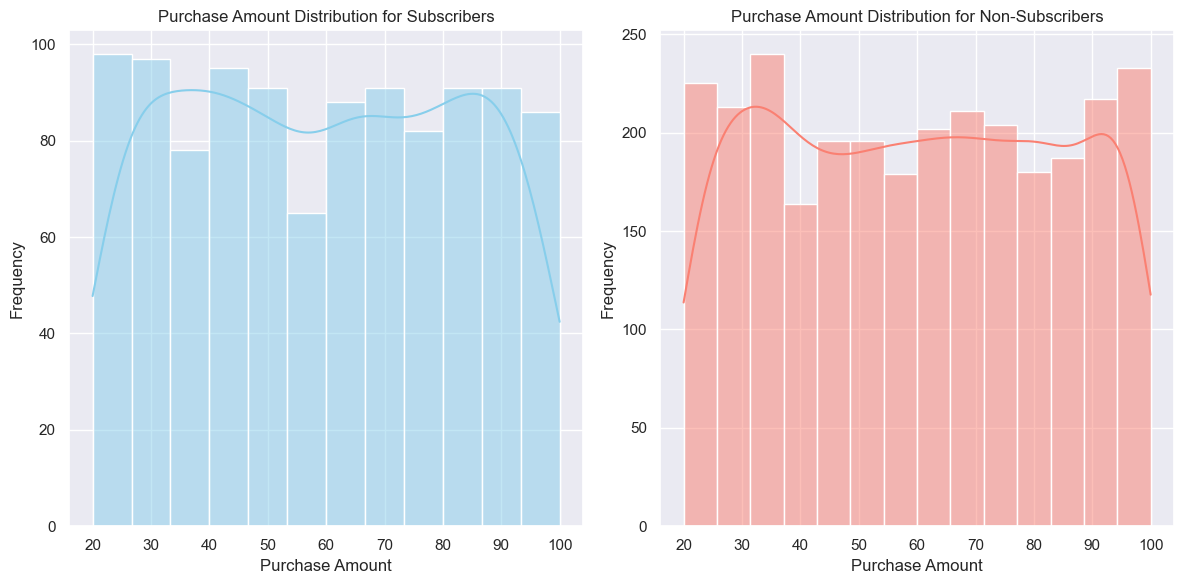

In [17]:
# Set up the figure and axes
plt.figure(figsize=(12, 6))

# Plot histogram for subscribers
plt.subplot(1, 2, 1)
sb.histplot(data[data['Subscription Status'] == 'Yes']['Purchase Amount (USD)'], color='skyblue', kde=True)
plt.title('Purchase Amount Distribution for Subscribers')
plt.xlabel('Purchase Amount')
plt.ylabel('Frequency')

# Plot histogram for non-subscribers
plt.subplot(1, 2, 2)
sb.histplot(data[data['Subscription Status'] == 'No']['Purchase Amount (USD)'], color='salmon', kde=True)
plt.title('Purchase Amount Distribution for Non-Subscribers')
plt.xlabel('Purchase Amount')
plt.ylabel('Frequency')

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()


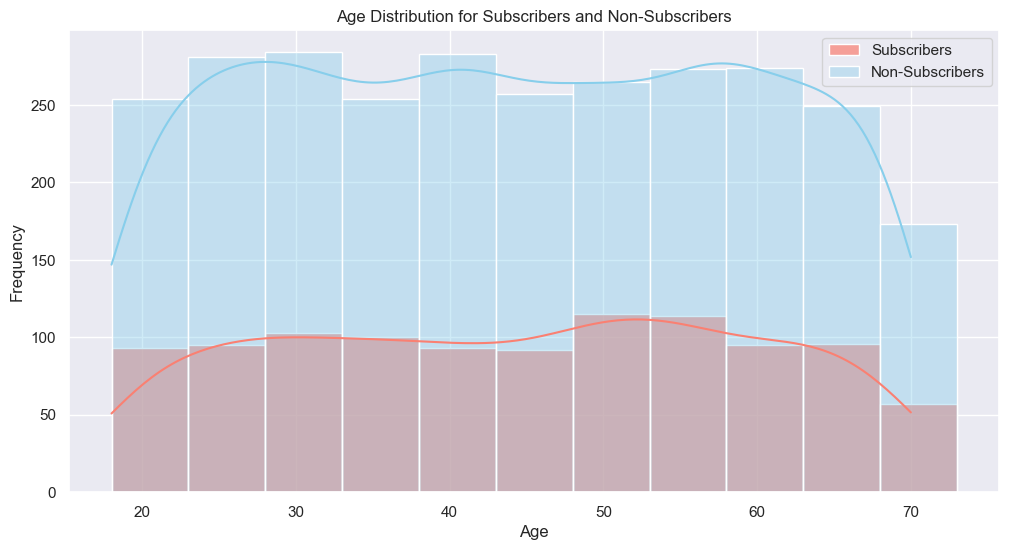

In [24]:
# Set up the figure and axes
plt.figure(figsize=(12, 6))

# Plot histogram for subscribers
sb.histplot(data=data[data['Subscription Status'] == 'Yes']['Age'], color='salmon', kde=True, binwidth=5, alpha=0.7, label='Subscribers')

# Plot histogram for non-subscribers
sb.histplot(data=data[data['Subscription Status'] == 'No']['Age'], color='skyblue', kde=True, binwidth=5, alpha=0.4, label='Non-Subscribers')

# Add title and labels
plt.title('Age Distribution for Subscribers and Non-Subscribers')
plt.xlabel('Age')
plt.ylabel('Frequency')

# Add legend
plt.legend()

# Show plot
plt.show()


### The age of people across non-subscribers are about the same whereas for subscribers, we have more subscribers that are 50 to 60 years old. Age 70 to 80 is the minority out of all our customers and so we should target more towards other age groups

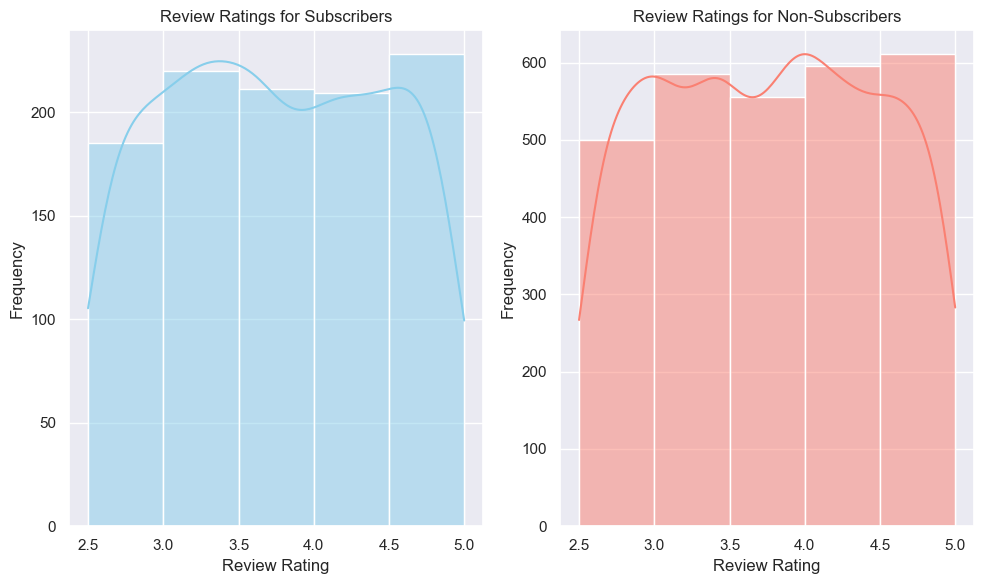

In [19]:
# Set up the figure and axes
plt.figure(figsize=(10, 6))

# Plot for subscribers
plt.subplot(1, 2, 1)
sb.histplot(data[data['Subscription Status'] == 'Yes']['Review Rating'], color='skyblue', kde=True, binwidth=0.5)
plt.title('Review Ratings for Subscribers')
plt.xlabel('Review Rating')
plt.ylabel('Frequency')

# Plot for non-subscribers
plt.subplot(1, 2, 2)
sb.histplot(data[data['Subscription Status'] == 'No']['Review Rating'], color='salmon', kde=True, binwidth=0.5)
plt.title('Review Ratings for Non-Subscribers')
plt.xlabel('Review Rating')
plt.ylabel('Frequency')

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()
